In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import latexStrings as ls
import mca

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import statsmodels.api as sm

%matplotlib qt5

In [2]:
data = pd.read_csv("data/heart.data").dropna()
data.index = range(data.shape[0])
# 297 observaciones despues de quitar nan

In [3]:
data.rename(columns = {"target":"diagnosis", "cp": "chest_pain", "trestbps": "rest_bp",
                      "restecg":"rest_ecg"}, inplace = True)

In [4]:
data.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age           297 non-null float64
sex           297 non-null float64
chest_pain    297 non-null float64
rest_bp       297 non-null float64
chol          297 non-null float64
fbs           297 non-null float64
rest_ecg      297 non-null float64
thalach       297 non-null float64
exang         297 non-null float64
oldpeak       297 non-null float64
slope         297 non-null float64
ca            297 non-null float64
thal          297 non-null float64
diagnosis     297 non-null int64
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


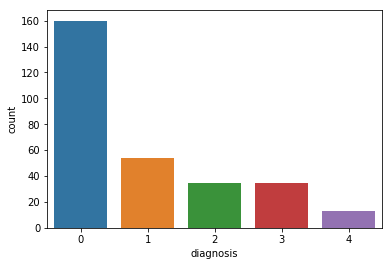

In [6]:
sns.countplot(x = "diagnosis", data = data)

In [7]:
# Diccionarios con los nombres de categorias
sex_cat = {0 : "female", 
           1 : "male"}

chest_pain_cat = {1 : "typical angina", 
                  2 : "atypical angina",
                  3 : "non-anginal pain",
                  4 : "asymptomatic"}

# Fasting blood sugar
fbs_cat = {0 : "<= 120mg/dl",
       1 : "> 120mg/dl"}

# Rersting ECG
rest_ecg = {0 : "normal",
            1 : "ST-T wave abnormality",
            2 : "probable left ventricular hypertrophy"}

# Excercise induced angina
exang = {0 : "no",
         1 : "yes"}

# slope of peak excersice ST segment
slope = {1 : "upsloping",
         2 : "flat",
         3 : "downsloping"}

# https://www.medilexicon.com/dictionary/72223
thal = {3 : "normal",
        6 : "fixed defect",
        7 : "reversable defect"}

In [8]:
# Juntar los valores 1, 2, 3, 4 de diagnosis al nuevo valor 1 (para q diagnosis sea v o f)
data["diagnosis"] = np.where(data["diagnosis"] > 0, 1, 0)
data.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [9]:
# Indices de vars categoricas y vars de razon
# ca (11) es categorica? numero de vessels iluminados en fluroscopia
cat_index = [1, 2, 5, 6, 8, 10, 11, 12]
num_index = [0, 3, 4, 7, 9]
data.iloc[:, cat_index].head()

,sex,chest_pain,fbs,rest_ecg,exang,slope,ca,thal
0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0
2,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0
3,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0
4,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0


In [10]:
data.iloc[:, num_index].head()

,age,rest_bp,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4


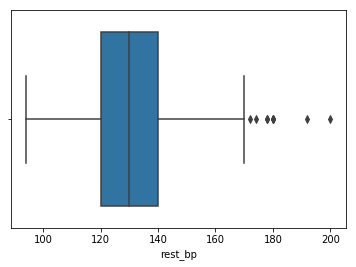

In [11]:
sns.boxplot(x = 'rest_bp', data = data)

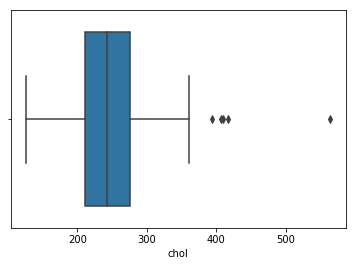

In [12]:
sns.boxplot(x = 'chol', data = data)

In [13]:
max(data['chol'])

564.0

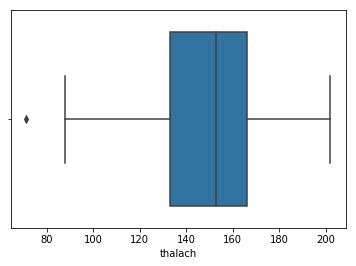

In [14]:
sns.boxplot(x = 'thalach', data = data)

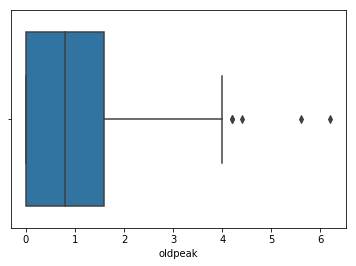

In [15]:
sns.boxplot(x = 'oldpeak', data = data)

In [16]:
max(data['oldpeak'])

6.2

In [17]:
X_num = data.iloc[:, num_index]
X_num_std = pd.DataFrame()

In [18]:
for col in X_num.columns:
    X_num_std[col] = preprocessing.scale(X_num[col])

In [19]:
X_num_std.head()

,age,rest_bp,chol,thalach,oldpeak
0,0.936181,0.750380,-0.276443,0.017494,1.068965
1,1.378929,1.596266,0.744555,-1.816334,0.381773
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662
3,-1.941680,-0.095506,0.051047,1.633010,2.099753
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874


In [20]:
processed_data = X_num_std.join(data.iloc[:, cat_index])

### Analisis Exploratorio

### Tablas de contingencia con pvals de relacion

In [21]:
# Tablas de contingencia de diagnosis vs vars categoricas
for att in data.columns[cat_index]:
    M = []
    print("Var = " + att )
    vals = np.unique(data[att]).astype(int)
    for val in vals:
        M.append([data.query(att + " == " + str(val) + " and diagnosis == 0").shape[0], 
                  data.query(att + " == " + str(val) + " and diagnosis == 1").shape[0]])
    M = np.array(M, dtype = int).T
    print("Matriz de Contingencia: ")
    print(ls.indexedMatrix(M, ['0', '1'], vals))
    pval = sm.stats.Table(M).test_nominal_association().pvalue
    print("p-val: " + str(pval) + "\n")

Var = sex
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 71 & 89 \\ 
1 & 25 & 112 \\ 
\end{block}
\end{blockarray}
p-val: 1.5945330533728708e-06

Var = chest_pain
Matriz de Contingencia: 
\begin{blockarray}{ccccc}
 & 1 & 2 & 3 & 4\\
\begin{block}{c(cccc)}
0 & 16 & 40 & 65 & 39 \\ 
1 & 7 & 9 & 18 & 103 \\ 
\end{block}
\end{blockarray}
p-val: 1.1102230246251565e-16

Var = fbs
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 137 & 23 \\ 
1 & 117 & 20 \\ 
\end{block}
\end{blockarray}
p-val: 0.9564761351720444

Var = rest_ecg
Matriz de Contingencia: 
\begin{blockarray}{cccc}
 & 0 & 1 & 2\\
\begin{block}{c(ccc)}
0 & 92 & 1 & 67 \\ 
1 & 55 & 3 & 79 \\ 
\end{block}
\end{blockarray}
p-val: 0.008331151353680788

Var = exang
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 137 & 23 \\ 
1 & 63 & 74 \\ 
\end{block}
\end{blockarray}
p-val: 3.82804898890754e-13

Var = slope
Matriz de Continge

In [22]:
# Pval de fbs salio 0.95, se quita de las vars de processed data
processed_data = processed_data.drop(columns=["fbs"])

In [23]:
index = num_index.copy()
index.append(0)

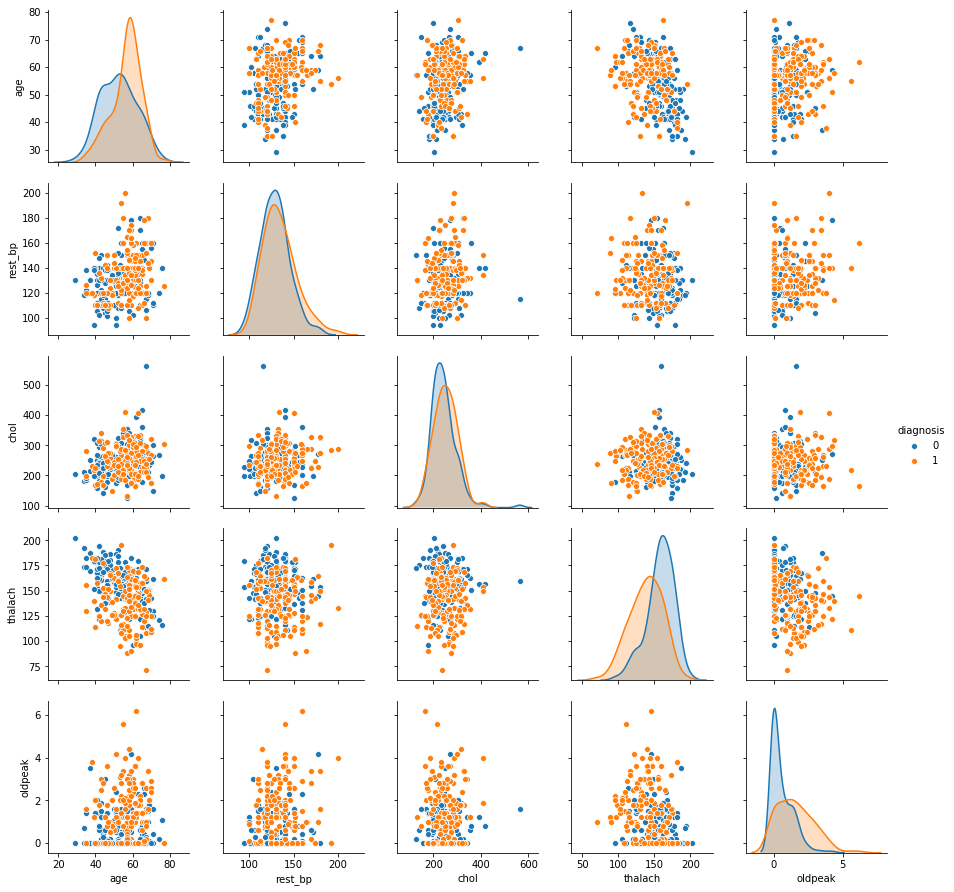

In [24]:
# histogramas para vars 
sns.pairplot(data, vars = data.columns[num_index], hue = "diagnosis")
plt.show()

In [25]:
processed_data['diagnosis'] = data['diagnosis']

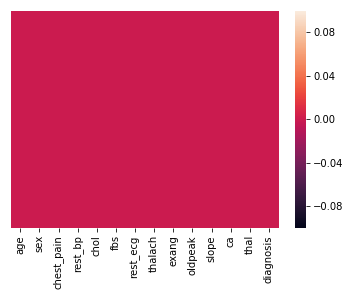

In [26]:
sns.heatmap(data=data.isnull(),yticklabels=False)

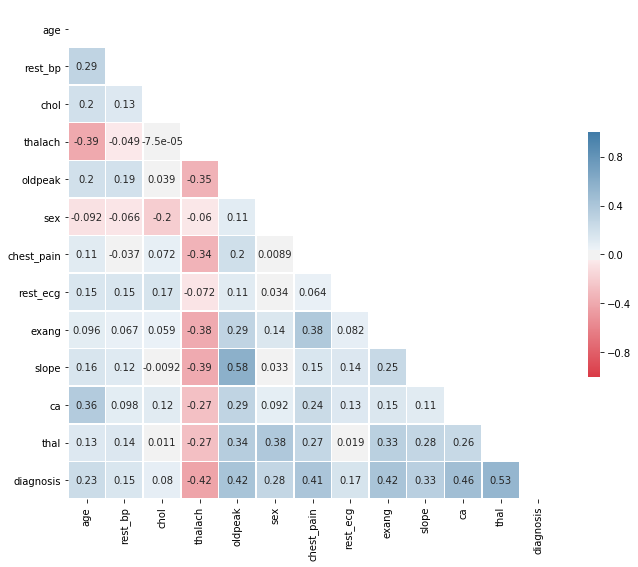

In [27]:
# Correlaciones
corr = processed_data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax = 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
#plt.savefig('graphs/correlaciones.png', dpi = 300)

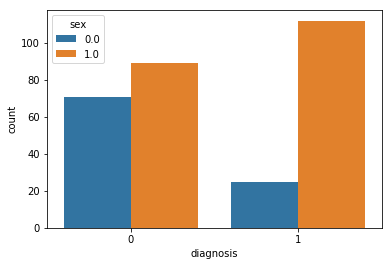

In [28]:
sns.countplot(x="diagnosis", data=processed_data, hue='sex')

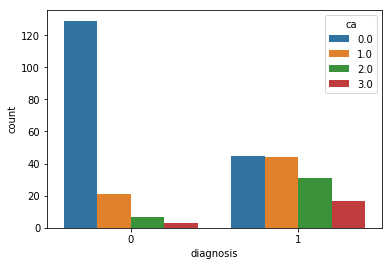

In [29]:
sns.countplot(x="diagnosis", data=processed_data, hue='ca')

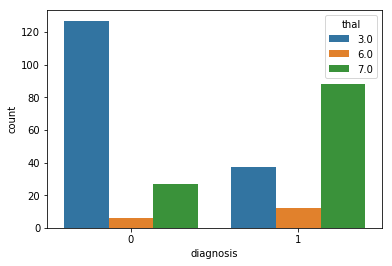

In [30]:
sns.countplot(x="diagnosis", data=processed_data, hue='thal')

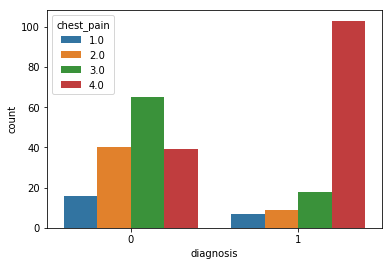

In [31]:
sns.countplot(x="diagnosis", data=processed_data, hue='chest_pain')

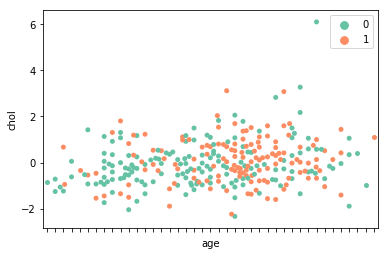

In [32]:
swarmPlot = sns.swarmplot(x = 'age', y = 'chol', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

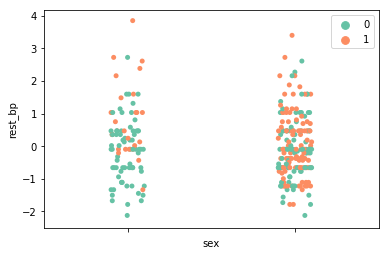

In [33]:
swarmPlot = sns.stripplot(x = 'sex', y = 'rest_bp', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

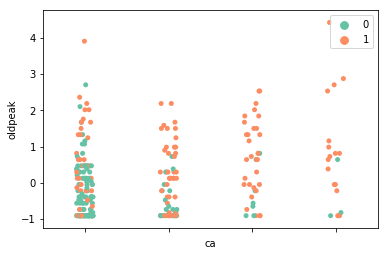

In [34]:
swarmPlot = sns.stripplot(x = 'ca', y = 'oldpeak', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

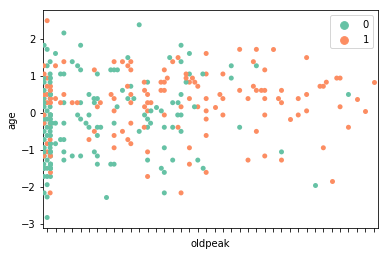

In [35]:
swarmPlot = sns.swarmplot(x = 'oldpeak', y = 'age', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

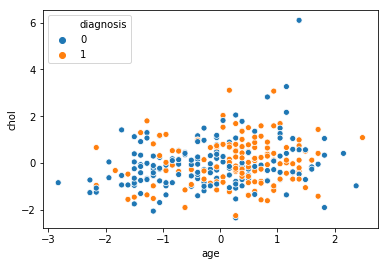

In [36]:
sns.scatterplot(x = 'age', y = 'chol', data = processed_data, hue = 'diagnosis')

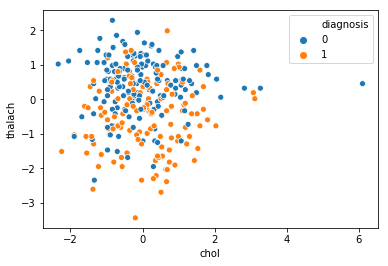

In [37]:
sns.scatterplot(x = 'chol', y = 'thalach', data = processed_data, hue = 'diagnosis')

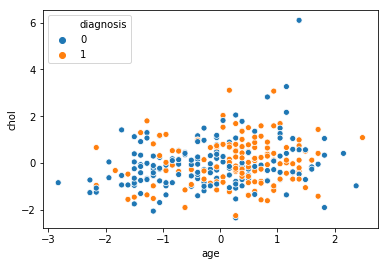

In [38]:
sns.scatterplot(x = 'age', y = 'chol', data = processed_data, hue = 'diagnosis')

### Clusters

In [39]:
from sklearn.cluster import KMeans


In [40]:
kmeans = KMeans(n_clusters=3)


In [41]:
cluster_data = data[data['diagnosis']==1][['sex','chol']]

In [42]:
kmeans.fit(cluster_data)
cluster_data['labels'] = kmeans.labels_
cluster_data.head()

,sex,chol,labels
1,1.0,286.0,0
2,1.0,229.0,2
6,0.0,268.0,2
8,1.0,254.0,2
9,1.0,203.0,1


[[]]

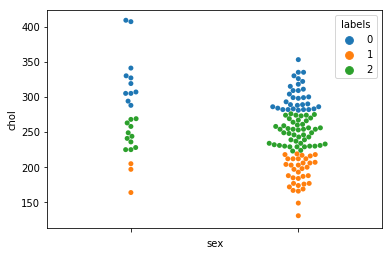

In [43]:
swarmPlot =  sns.swarmplot(x="sex", y="chol", data=cluster_data, hue='labels')
swarmPlot.set(xticklabels=[])

### Dummy var

In [44]:
X = processed_data.drop(columns = ['diagnosis'])
y = processed_data['diagnosis']

In [45]:
X['sex'] = processed_data['sex'].map(sex_cat)
X['chest_pain'] = processed_data['chest_pain'].map(chest_pain_cat)
X['rest_ecg'] = processed_data['rest_ecg'].map(rest_ecg)
#X['fbs'] = data['fbs'].map(fbs_cat)
X['exang'] = processed_data['exang'].map(exang)
X['slope'] = processed_data['slope'].map(slope)
X['thal'] = processed_data['thal'].map(thal)

In [46]:
X.isnull().sum()

age           0
rest_bp       0
chol          0
thalach       0
oldpeak       0
sex           0
chest_pain    0
rest_ecg      0
exang         0
slope         0
ca            0
thal          0
dtype: int64

In [47]:
X = pd.get_dummies(X, columns =['sex', 'chest_pain','rest_ecg','exang','slope','thal','ca'], 
                   prefix = ['is','has','ecg','exang','slope','thal','ca'],drop_first = True)



In [48]:
X.head()

,age,rest_bp,chol,thalach,oldpeak,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,1,0,0,1,0,1,0,0,0,0,0,0,0,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,1,0,0,0,0,1,1,1,0,1,0,0,0,1
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1,0,0,0,0,1,1,1,0,0,1,0,1,0
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,1,0,1,0,1,0,0,0,0,1,0,0,0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,1,0,0,0,1,0,0,1,1,0,0,0,0


### Logit simple

In [49]:
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 158999)

In [50]:
len(y_train)

237

In [51]:
len(y_test)

60

In [52]:
logit = sm.Logit(y_train,X_train1)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.308976
         Iterations 8


In [53]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  237
Model:                          Logit   Df Residuals:                      218
Method:                           MLE   Df Model:                           18
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5494
Time:                        20:51:24   Log-Likelihood:                -73.227
converged:                       True   LL-Null:                       -162.50
                                        LLR p-value:                 1.866e-28
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
age                                          -0.1818      0.251     -0.726      0.468      -0.673       0.309
rest_bp                                       0.5574      0.240      2.323      0.020       0.087       1.028
chol                                          0.0993      0.245      0.406      0.685      -0.381       0.579
thalach                                      -0.5522      0.316     -1.747      0.081      -1.172       0.067
oldpeak                                       0.5908      0.322      1.835      0.066      -0.040       1.222
is_male                                       1.9621      0.656      2.989      0.003       0.676       3.249
has_atypical angina                          -0.6782      0.636     -1.067      0.286      -1.924       0.568
has_non-anginal pain                         -1.8394      0.569     -3.232      0.001      -2.955      -0.724
has_typical angina                           -2.6529      0.824     -3.219      0.001      -4.268      -1.038
ecg_normal                                   -2.7480      1.191     -2.308      0.021      -5.082      -0.414
ecg_probable left ventricular hypertrophy    -2.1204      1.210     -1.752      0.080      -4.493       0.252
exang_yes                                     0.7125      0.514      1.387      0.165      -0.294       1.719
slope_flat                                    0.6553      0.881      0.744      0.457      -1.071       2.382
slope_upsloping                              -0.3738      0.990     -0.378      0.706      -2.314       1.566
thal_normal                                  -0.0206      0.896     -0.023      0.982      -1.776       1.735
thal_reversable defect                        1.0438      0.864      1.208      0.227      -0.649       2.737
ca_1.0                                        2.3302      0.594      3.925      0.000       1.167       3.494
ca_2.0                                        3.2776      0.811      4.041      0.000       1.688       4.867
ca_3.0                                        1.8197      0.936      1.945      0.052      -0.014       3.654
=============================================================================================================
"""

In [54]:
X_train2 = X_train1.drop(columns = ['age','chol', 'slope_flat', 'slope_upsloping',
                                     'ecg_normal','ecg_probable left ventricular hypertrophy','exang_yes'])

In [55]:
X_train2.head()

,rest_bp,thalach,oldpeak,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
159,-1.730887,0.279470,-0.906712,1,1,0,0,0,1,0,0,0
200,0.468418,-0.724769,-0.734914,0,0,1,0,0,1,0,0,0
115,0.468418,0.672433,-0.906712,1,0,1,0,1,0,0,0,0
21,1.032342,0.541445,-0.047722,0,0,0,1,1,0,0,0,0
145,1.878229,-1.117733,-0.047722,1,0,0,0,0,1,0,0,1


In [56]:
logit2 = sm.Logit(y_train,X_train2)
logit_model2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.333898
         Iterations 7


In [57]:
logit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  237
Model:                          Logit   Df Residuals:                      225
Method:                           MLE   Df Model:                           11
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5130
Time:                        20:51:24   Log-Likelihood:                -79.134
converged:                       True   LL-Null:                       -162.50
                                        LLR p-value:                 5.560e-30
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
rest_bp                    0.4852      0.214      2.263      0.024       0.065       0.905
thalach                   -0.6004      0.256     -2.349      0.019      -1.101      -0.100
oldpeak                    0.7549      0.276      2.735      0.006       0.214       1.296
is_male                    1.2101      0.460      2.632      0.008       0.309       2.111
has_atypical angina       -1.1584      0.587     -1.972      0.049      -2.310      -0.007
has_non-anginal pain      -1.9556      0.524     -3.735      0.000      -2.982      -0.929
has_typical angina        -2.6056      0.757     -3.441      0.001      -4.090      -1.121
thal_normal               -1.4145      0.453     -3.124      0.002      -2.302      -0.527
thal_reversable defect    -0.1574      0.546     -0.289      0.773      -1.227       0.912
ca_1.0                     2.0202      0.535      3.773      0.000       0.971       3.070
ca_2.0                     2.4579      0.671      3.665      0.000       1.143       3.772
ca_3.0                     1.5081      0.909      1.659      0.097      -0.273       3.290
==========================================================================================
"""

In [58]:
logmodel = LogisticRegression(class_weight = "balanced", solver = "liblinear")
logmodel.fit(X_train1,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### LDA

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 158999)

In [60]:
lda_test = LinearDiscriminantAnalysis(n_components=4)

In [61]:
X_lda_train = lda_test.fit_transform(X_train, y_train)
X_lda_test = lda_test.transform(X_test)

In [62]:
lda_logit = sm.Logit(y_train,X_lda_train)
lda_logit_model = lda_logit.fit()

lda_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.316801
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  237
Model:                          Logit   Df Residuals:                      236
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5379
Time:                        20:51:24   Log-Likelihood:                -75.082
converged:                       True   LL-Null:                       -162.50
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0396      0.256      7.982      0.000       1.539       2.540
==============================================================================
"""

In [63]:
log_lda_model = LogisticRegression(class_weight = "balanced", solver = "liblinear")
log_lda_model.fit(X_lda_train,y_train)
predictions_lda = log_lda_model.predict(X_lda_test)
print('LDA with Components =', 2)
print(classification_report(y_test,predictions_lda))

LDA with Components = 2
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        33

   micro avg       0.82      0.82      0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



### MCA

In [64]:
# MCA
labels = ['sex', 'chest_pain', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal']
mca_ben = mca.MCA(data, cols = labels)

In [65]:
mca_ben.L

array([0.03560743, 0.00199655, 0.00141772, 0.00046124, 0.00023844])

In [66]:
np.sum(mca_ben.L)

0.039721378509345255

In [67]:
exp_var = mca_ben.expl_var(greenacre=True, N=5)
exp_var

array([0.70934877, 0.03977402, 0.02824292, 0.00918853, 0.00474995])

In [68]:
np.sum(exp_var)

0.7913041987732712

In [69]:
multi = [[], []]
for l in labels:
    for val in np.unique(data[l]).astype(int):
        multi[0] += [l]
        multi[1] += [str(val)]

mca_c_df = pd.DataFrame(data = mca_ben.fs_c(N=5), columns = ["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5"],
                        index = multi)
mca_c_df

Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
sex        0 -0.201002  0.030414  0.078426 -0.021534 -0.022564
           1  0.096001 -0.014526 -0.037457  0.010285  0.010777
chest_pain 1 -0.017422 -0.182367 -0.068036 -0.043623  0.003457
           2 -0.347495  0.014910 -0.048723 -0.033033  0.027892
           3 -0.214006 -0.013944  0.030260  0.057883 -0.016284
           4  0.247820  0.032543  0.010146 -0.015369 -0.000667
fbs        0 -0.012846  0.027544  0.002278 -0.005175  0.006918
           1  0.075880 -0.162704 -0.013458  0.030570 -0.040866
rest_ecg   0 -0.094105  0.026514 -0.024055  0.001851  0.010439
           1  0.262997  0.018675  0.530828 -0.010281  0.114168
           2  0.087544 -0.027208  0.009677 -0.001582 -0.013639
exang      0 -0.164206 -0.019440 -0.000668  0.003749 -0.000972
           1  0.338568  0.040083  0.001376 -0.007730  0.002003
slope      1 -0.210826  0.007602 -0.036985  0.001844 -0.001525
           2  0.188908  0.022850  0.029409 -0.001903 -0.007310
           3  0.163072 -0.199383  0.052944  0.000208  0.057778
ca         0 -0.148325 -0.007602  0.004356 -0.007694  0.012810
           1  0.146306  0.062595 -0.025086  0.044939 -0.006077
           2  0.262203 -0.038950 -0.030460 -0.081223 -0.051627
           3  0.316745 -0.063290  0.101502  0.075206  0.006392
thal       3 -0.229768  0.004765  0.019351 -0.006825 -0.006832
           6  0.362124 -0.171315  0.063052 -0.035949  0.043818
           7  0.270988  0.020020 -0.037465  0.015360  0.002885

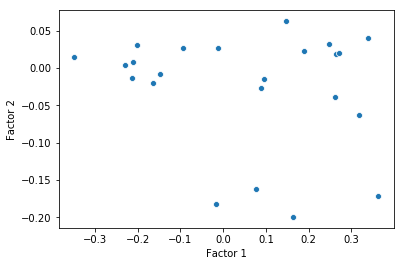

In [70]:
# plot columnas
# mayb hacer un mejor plot, dando figura a cada atributo y diferentes colores por valor
sns.scatterplot(x = "Factor 1", y = "Factor 2", data = mca_c_df)
plt.show()

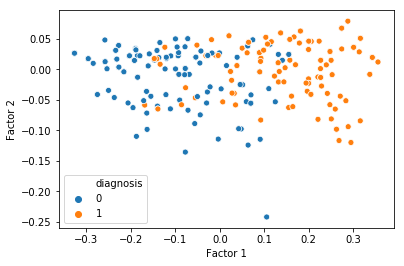

In [71]:
mca_r_df = pd.DataFrame(data = mca_ben.fs_r(N=5), columns = ["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5"])

mca_r_df["diagnosis"] = data["diagnosis"]
mca_r_df

# plot de renglones
sns.scatterplot(x = "Factor 1", y = "Factor 2", data = mca_r_df, hue = "diagnosis")
plt.show()

## Sets de entrenamiento

In [72]:
# Escoger 238 (80 %) de las observaciones para el conjunto de entrenamiento
np.random.seed(155766)
train_rows = np.sort(np.random.choice(X.index, 238, replace = False))
X_train = X.iloc[train_rows, :]
train_diagnosis = data.iloc[train_rows, 13].values
X_test = X.drop(train_rows)
test_diagnosis = data.drop(train_rows)["diagnosis"].values

In [73]:
X_train.head()

,age,rest_bp,chol,thalach,oldpeak,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,1,0,0,1,0,1,0,0,0,0,0,0,0,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,1,0,0,0,0,1,1,1,0,1,0,0,0,1
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1,0,0,0,0,1,1,1,0,0,1,0,1,0
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,1,0,1,0,1,0,0,0,0,1,0,0,0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,1,0,0,0,1,0,0,1,1,0,0,0,0


In [74]:
X_test.head()

,age,rest_bp,chol,thalach,oldpeak,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
8,0.936181,-0.095506,0.128103,-0.113493,0.295874,1,0,0,0,0,1,0,1,0,0,1,1,0,0
9,-0.170689,0.468418,-0.854367,0.235807,1.756157,1,0,0,0,0,1,1,0,0,0,1,0,0,0
14,-0.281376,2.272976,-0.931424,0.541445,-0.477217,1,0,1,0,1,0,0,0,1,0,1,0,0,0
18,-0.724124,-0.095506,0.532650,-0.462794,-0.734914,0,0,1,0,1,0,0,0,1,1,0,0,0,0
23,0.382746,0.017278,-0.449820,1.021734,1.842056,1,0,1,0,0,1,0,0,1,0,1,0,1,0


## PCA

In [75]:
# Reducir el dataset a las columnas numericas
X_numerical_train = X_train.iloc[:, 0:5]
X_numerical_test = X_test.iloc[:, 0:5]
X_numerical_train.head()

,age,rest_bp,chol,thalach,oldpeak
0,0.936181,0.750380,-0.276443,0.017494,1.068965
1,1.378929,1.596266,0.744555,-1.816334,0.381773
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662
3,-1.941680,-0.095506,0.051047,1.633010,2.099753
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874


In [76]:
X_numerical_test.head()

,age,rest_bp,chol,thalach,oldpeak
8,0.936181,-0.095506,0.128103,-0.113493,0.295874
9,-0.170689,0.468418,-0.854367,0.235807,1.756157
14,-0.281376,2.272976,-0.931424,0.541445,-0.477217
18,-0.724124,-0.095506,0.532650,-0.462794,-0.734914
23,0.382746,0.017278,-0.449820,1.021734,1.842056


In [77]:
# PCA
pca = PCA(n_components=5, random_state=155766)
pca.fit(X_numerical_train)
cols = ["c1", "c2", "c3", "c4", "c5"]

pca_df_train = pd.DataFrame(pca.transform(X_numerical_train), columns = cols, index = X_numerical_train.index)
pca_df_train["diagnosis"] = train_diagnosis

pca_df_test = pd.DataFrame(pca.transform(X_numerical_test), columns = cols, index = X_numerical_test.index)
pca_df_test["diagnosis"] = test_diagnosis

In [78]:
pca_df_train.head()

,c1,c2,c3,c4,c5,diagnosis
0,1.167109,0.030140,-0.795210,0.078391,-0.689399,0
1,2.554142,0.539770,0.037864,-0.683931,0.837171,1
2,1.478901,-1.158254,0.414328,-0.048415,-1.018201,1
3,-1.030767,-0.249900,-1.246585,2.837654,-0.463751,0
4,-1.494417,-0.454286,-1.069753,0.810109,0.051277,0


In [79]:
#Dataframe con vars de prueba, para uso futuro
pca_df_test.head()

,c1,c2,c3,c4,c5,diagnosis
8,0.622213,0.054979,0.247559,-0.245862,-0.626363,1
9,0.553241,-0.783714,-1.363911,0.958832,-0.545313,1
14,-0.100174,0.917559,-2.220107,-0.729810,0.658897,0
18,-0.543503,0.204138,0.563956,-0.048892,0.981354,0
23,0.402666,-0.320911,-0.983989,1.126464,-1.488305,1


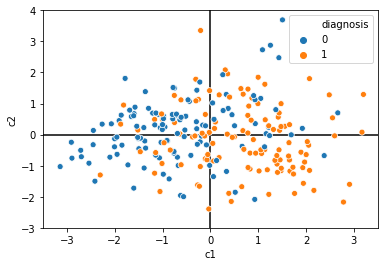

In [105]:
plt.hlines(0, -3.5, 3.5, zorder = -1)
plt.vlines(0, -3, 4, zorder = -1)
plt.axis([-3.5, 3.5, -3, 4])
sns.scatterplot(x = "c1", y = "c2", data = pca_df_train, hue = "diagnosis")
plt.savefig("img/componentes.png", dpi = 700)
#plt.show()

In [81]:
pca.explained_variance_ratio_

array([0.35381261, 0.21536782, 0.18011913, 0.1553517 , 0.09534874])

## Logit

In [82]:
logit = sm.Logit(train_diagnosis, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.297090
         Iterations 8


In [83]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  238
Model:                          Logit   Df Residuals:                      219
Method:                           MLE   Df Model:                           18
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5714
Time:                        20:51:25   Log-Likelihood:                -70.707
converged:                       True   LL-Null:                       -164.97
                                        LLR p-value:                 1.949e-30
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
age                                          -0.1956      0.255     -0.768      0.442      -0.695       0.304
rest_bp                                       0.5909      0.245      2.412      0.016       0.111       1.071
chol                                          0.3512      0.237      1.484      0.138      -0.113       0.815
thalach                                      -0.6209      0.309     -2.007      0.045      -1.227      -0.015
oldpeak                                       0.4246      0.316      1.343      0.179      -0.195       1.044
is_male                                       1.5248      0.608      2.508      0.012       0.333       2.716
has_atypical angina                          -0.2588      0.640     -0.404      0.686      -1.513       0.996
has_non-anginal pain                         -2.2580      0.623     -3.625      0.000      -3.479      -1.037
has_typical angina                           -2.2821      0.816     -2.797      0.005      -3.881      -0.683
ecg_normal                                   -3.1987      1.631     -1.961      0.050      -6.395      -0.002
ecg_probable left ventricular hypertrophy    -2.7147      1.622     -1.673      0.094      -5.895       0.465
exang_yes                                     0.9183      0.498      1.843      0.065      -0.058       1.895
slope_flat                                    1.0099      1.181      0.855      0.392      -1.304       3.324
slope_upsloping                              -0.2450      1.262     -0.194      0.846      -2.719       2.229
thal_normal                                   0.3979      1.001      0.398      0.691      -1.564       2.359
thal_reversable defect                        2.1294      0.992      2.147      0.032       0.186       4.073
ca_1.0                                        2.3063      0.610      3.780      0.000       1.111       3.502
ca_2.0                                        3.3164      0.903      3.672      0.000       1.546       5.086
ca_3.0                                        1.4687      0.918      1.600      0.110      -0.331       3.268
=============================================================================================================
"""

In [84]:
X_train2 = X_train.drop(columns = ['age','chol', 'slope_flat', 'slope_upsloping',
                                     'ecg_normal','ecg_probable left ventricular hypertrophy','exang_yes'])

In [85]:
X_train2.head()

,rest_bp,thalach,oldpeak,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
0,0.750380,0.017494,1.068965,1,0,0,1,0,0,0,0,0
1,1.596266,-1.816334,0.381773,1,0,0,0,1,0,0,0,1
2,-0.659431,-0.899420,1.326662,1,0,0,0,0,1,0,1,0
3,-0.095506,1.633010,2.099753,1,0,1,0,1,0,0,0,0
4,-0.095506,0.978071,0.295874,0,1,0,0,1,0,0,0,0


In [86]:
logit2 = sm.Logit(train_diagnosis,X_train2)
logit_model2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.334545
         Iterations 7


In [87]:
logit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  238
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                           11
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5174
Time:                        20:51:25   Log-Likelihood:                -79.622
converged:                       True   LL-Null:                       -164.97
                                        LLR p-value:                 8.489e-31
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
rest_bp                    0.4749      0.213      2.226      0.026       0.057       0.893
thalach                   -0.6225      0.246     -2.533      0.011      -1.104      -0.141
oldpeak                    0.6901      0.279      2.473      0.013       0.143       1.237
is_male                    0.6667      0.442      1.509      0.131      -0.199       1.533
has_atypical angina       -0.7966      0.576     -1.383      0.167      -1.926       0.332
has_non-anginal pain      -2.4158      0.563     -4.294      0.000      -3.519      -1.313
has_typical angina        -2.3303      0.730     -3.194      0.001      -3.760      -0.900
thal_normal               -1.1034      0.405     -2.727      0.006      -1.896      -0.310
thal_reversable defect     0.7714      0.517      1.493      0.135      -0.241       1.784
ca_1.0                     2.0827      0.539      3.866      0.000       1.027       3.138
ca_2.0                     2.5819      0.759      3.401      0.001       1.094       4.070
ca_3.0                     1.3313      0.884      1.505      0.132      -0.402       3.065
==========================================================================================
"""

In [88]:
logmodel = LogisticRegression(solver = "liblinear", class_weight = "balanced")
logmodel.fit(X_train1,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Logit utilizando pca

In [89]:
log_df_train = X_train.iloc[:, 5:].join(pca_df_train)
log_df_test = X_test.iloc[:, 5:].join(pca_df_test)

In [90]:
log_df_train.head()

,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0,c1,c2,c3,c4,c5,diagnosis
0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1.167109,0.030140,-0.795210,0.078391,-0.689399,0
1,1,0,0,0,0,1,1,1,0,1,0,0,0,1,2.554142,0.539770,0.037864,-0.683931,0.837171,1
2,1,0,0,0,0,1,1,1,0,0,1,0,1,0,1.478901,-1.158254,0.414328,-0.048415,-1.018201,1
3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,-1.030767,-0.249900,-1.246585,2.837654,-0.463751,0
4,0,1,0,0,0,1,0,0,1,1,0,0,0,0,-1.494417,-0.454286,-1.069753,0.810109,0.051277,0


In [91]:
log_df_test.head()

,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0,c1,c2,c3,c4,c5,diagnosis
8,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0.622213,0.054979,0.247559,-0.245862,-0.626363,1
9,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0.553241,-0.783714,-1.363911,0.958832,-0.545313,1
14,1,0,1,0,1,0,0,0,1,0,1,0,0,0,-0.100174,0.917559,-2.220107,-0.729810,0.658897,0
18,0,0,1,0,1,0,0,0,1,1,0,0,0,0,-0.543503,0.204138,0.563956,-0.048892,0.981354,0
23,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0.402666,-0.320911,-0.983989,1.126464,-1.488305,1


In [92]:
# Guardar los modelos del logit en un arreglo, dependiendo de componentes utilizados
logit_array = []
for i in range(5):
    logit = LogisticRegression(solver = "liblinear", random_state = 155766)
    logit.fit(log_df_train.iloc[:, :(-5+i)], log_df_train["diagnosis"])
    
    # Info de proba usando el logit de statsmodels
    logit_m = sm.Logit(train_diagnosis, log_df_train.iloc[:, :(-5+i)], solver = "liblinear")
    logit_m = logit_m.fit()
    print(logit_m.summary())
    
    logit_array.append(logit)

Optimization terminated successfully.
         Current function value: 0.310367
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  238
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                           14
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5522
Time:                        20:51:25   Log-Likelihood:                -73.867
converged:                       True   LL-Null:                       -164.97
                                        LLR p-value:                 2.312e-31
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
is_male                                       

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  238
Model:                          Logit   Df Residuals:                      219
Method:                           MLE   Df Model:                           18
Date:                Tue, 07 May 2019   Pseudo R-squ.:                  0.5714
Time:                        20:51:25   Log-Likelihood:                -70.709
converged:                       True   LL-Null:                       -164.97
                                        LLR p-value:                 1.952e-30
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
is_male                                       1.5251      0.608      2.509      0.012       0.334       2.717
has_atypical angina                   

In [93]:
# Informacion de todos los logit
for l in range(5):
    print("Logit con "+ str(l+1) + " componentes")
    
    print("Info de train")
    print("Score: ")
    print(logit_array[l].score(log_df_train.iloc[:, :(-5+l)], train_diagnosis))

    # Matriz de confusion de train (prediccion en renglones, diagnosis en cols)
    M = np.zeros((2,2), dtype=int)
    pred = logit_array[l].predict(log_df_train.iloc[:, :(-5+l)])
    for i, j in zip(pred, train_diagnosis):
        M[i, j] += 1
    print("Matriz de Confusion")
    print(ls.indexedMatrix(M, [0, 1], [0, 1]))
    
    print("Info de test")
    # Aciertos sobre errores de test
    print("Score: ")
    print(logit_array[l].score(log_df_test.iloc[:, :(-5+l)], test_diagnosis))

    # Matriz de confusion de test
    M = np.zeros((2,2), dtype=int)
    pred = logit_array[l].predict(log_df_test.iloc[:, :(-5+l)])
    for i, j in zip(pred, test_diagnosis):
        M[i, j] += 1
    print(ls.indexedMatrix(M, [0, 1], [0, 1]))
    print("\n")

Logit con 1 componentes
Info de train
Score: 
0.8445378151260504
Matriz de Confusion
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 101 & 19 \\ 
1 & 18 & 100 \\ 
\end{block}
\end{blockarray}
Info de test
Score: 
0.864406779661017
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 38 & 5 \\ 
1 & 3 & 13 \\ 
\end{block}
\end{blockarray}


Logit con 2 componentes
Info de train
Score: 
0.8445378151260504
Matriz de Confusion
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 101 & 19 \\ 
1 & 18 & 100 \\ 
\end{block}
\end{blockarray}
Info de test
Score: 
0.847457627118644
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 37 & 5 \\ 
1 & 4 & 13 \\ 
\end{block}
\end{blockarray}


Logit con 3 componentes
Info de train
Score: 
0.8487394957983193
Matriz de Confusion
\begin{blockarray}{ccc}
 & 0 & 1\\
\begin{block}{c(cc)}
0 & 102 & 19 \\ 
1 & 17 & 100 \\ 
\end{block}
\end{blockarray}
Info de test
Score: 
0.864406779661017
\begin{blockarray}{ccc}
 & 0 & 1\\
\b